In [ ]:
import numpy as np
import userlib.util as tool
import matplotlib.pyplot as plt
import numpy.random as ran
import userlib.RVgenerator as RVG
from joblib import Parallel, delayed
import os
import matplotlib as mpl
import scipy.stats as st

%matplotlib inline
mpl.rc('legend', fontsize=13)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
mpl.rc('figure', titlesize=16)
mpl.rc('figure', dpi=75)
mpl.rc('figure', figsize=(8,8))

    
def getFbDtcObs(groups, epsilon):
    err_epsl = 2**0.5 * epsilon
    a_coefs = np.arange(1.,6.1,0.2)
    fb_dtc_obs = []
    for a in a_coefs:
        flag_binary = np.zeros(len(groups))
        for p in range(len(groups)):
            g = groups[p]
            for i in range(len(g['rvs'])-1):
                for j in range(i+1, len(g['rvs'])):
                    if (np.abs(g['rvs'][i]-g['rvs'][j]) > a*err_epsl):
                        flag_binary[p] = 1
                        break
                else:
                    continue
                break
        fb_dtc_obs.append(sum(flag_binary)/len(groups))
#     np.save(originalDataPath + 'a_fbin_dtc_obs.npy', [a_coefs, fb_dtc_obs])
    d = np.array([a_coefs, np.round(fb_dtc_obs,4)])
    print (d)
    return d
    
    
def assemblePopulation():
    samplePath = './links/binary/population/mme(%.02f)/'%epsilon
    binaryPath = samplePath + 'binary/pi(%.02f)/kappa(%.02f)/eta(%.02f)/'%(pi_true, kappa_true, eta_true)
    singleStarPath = samplePath + 'singleStar/'
    
    bfn = 'binary(%i)epochs(%02i)epsilon(%.02f)P(%i,%i)q(%.01f,%.01f)e(%.01f,%.01f)m1(%i,%i)_(%.02f,%.02f,%.02f).npy'%(
           2000, obstms, epsilon, 1, 3000, 0.1, 1, 0., 0.9, 1, 10, \
           pi_true, kappa_true, eta_true)
    bs = np.load(binaryPath + bfn, allow_pickle=1)
    Nbin_true = int(sampleSize*fbin_true)
    valid_inds = ran.choice(2000, Nbin_true, replace=False)
    bs = bs[valid_inds]
    
    sfn = 'singleStar(%i)epochs(%02i)epsilon(%.02f).npy'%(2000, obstms, epsilon)
    ss = np.load(singleStarPath + sfn, allow_pickle=1)
    Ns_true = sampleSize - Nbin_true
    valid_inds = ran.choice(2000, Ns_true, replace=False)
    ss = ss[valid_inds]
    
    samples = np.r_[bs, ss]
    np.random.shuffle(samples)
    return samples


def showImgJointMarginalDistribution(d):
    plt.figure(figsize=(9,6))
    X, Y = d[0], d[1]
#     plt.title('sample size=%i, $\epsilon$=%.02f'%(sampleSize,epsilon))
    plt.plot(X,Y,'o-',c='gray',lw=1.5)
    plt.axhline(fbin_true,lw=2,ls=':', c='b',label='true $f_{bin}=%.03f$'%fbin_true)
    plt.axvline(4, lw=2, c='r', ls='-')
    plt.axhline(d[1][15],lw=1.5,ls='-.', c='r', label='detected $f_{bin}=%.03f$'%d[1][15])
    plt.xlabel('$a$')
    plt.ylabel('detected $f_{bin}$')
    plt.ylim(0,1.05)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('./paper_RGB_figures/fbin_dtcObs/fbin_dtcObs_esof(%.03f,%i,%i,%.03f).pdf'%(epsilon,sampleSize,obstms,fbin_true))
    plt.show()
    plt.close()
    
    

[[1.    1.2   1.4   1.6   1.8   2.    2.2   2.4   2.6   2.8   3.    3.2
  3.4   3.6   3.8   4.    4.2   4.4   4.6   4.8   5.    5.2   5.4   5.6
  5.8   6.   ]
 [0.995 0.979 0.943 0.891 0.788 0.662 0.541 0.433 0.328 0.247 0.189 0.152
  0.123 0.095 0.086 0.076 0.066 0.059 0.057 0.052 0.049 0.046 0.046 0.044
  0.043 0.04 ]]


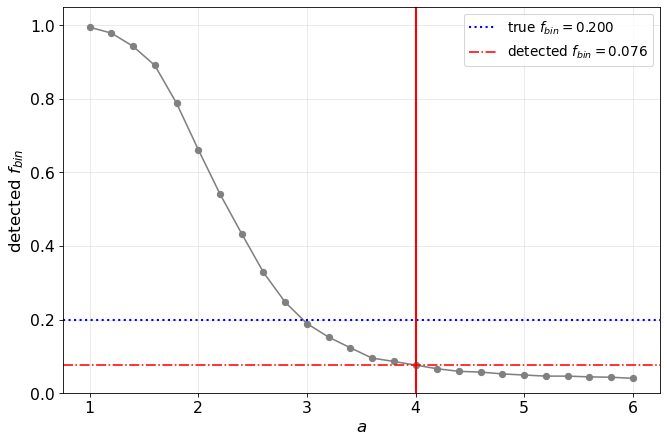

[[1.    1.2   1.4   1.6   1.8   2.    2.2   2.4   2.6   2.8   3.    3.2
  3.4   3.6   3.8   4.    4.2   4.4   4.6   4.8   5.    5.2   5.4   5.6
  5.8   6.   ]
 [0.997 0.989 0.954 0.9   0.823 0.718 0.61  0.508 0.423 0.358 0.31  0.255
  0.21  0.181 0.168 0.154 0.142 0.134 0.127 0.116 0.102 0.096 0.089 0.083
  0.077 0.072]]


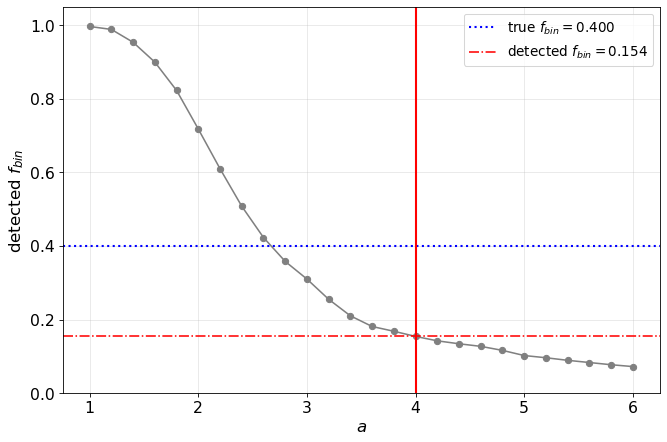

[[1.    1.2   1.4   1.6   1.8   2.    2.2   2.4   2.6   2.8   3.    3.2
  3.4   3.6   3.8   4.    4.2   4.4   4.6   4.8   5.    5.2   5.4   5.6
  5.8   6.   ]
 [0.997 0.985 0.963 0.919 0.861 0.773 0.683 0.593 0.521 0.446 0.382 0.329
  0.293 0.266 0.247 0.235 0.213 0.198 0.189 0.176 0.159 0.152 0.146 0.135
  0.127 0.117]]


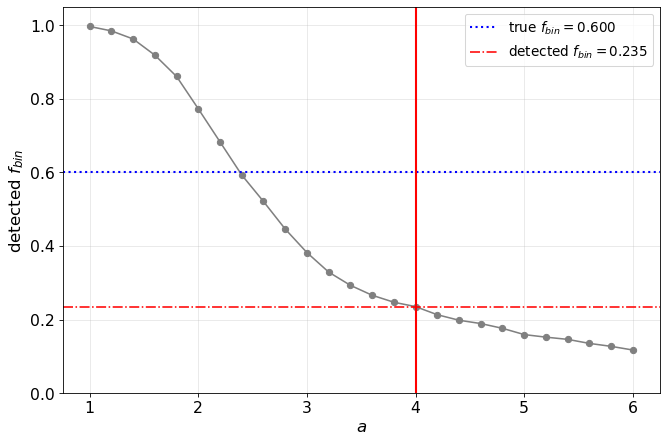

[[1.    1.2   1.4   1.6   1.8   2.    2.2   2.4   2.6   2.8   3.    3.2
  3.4   3.6   3.8   4.    4.2   4.4   4.6   4.8   5.    5.2   5.4   5.6
  5.8   6.   ]
 [1.    0.993 0.975 0.947 0.895 0.824 0.756 0.675 0.617 0.555 0.495 0.443
  0.396 0.359 0.342 0.319 0.304 0.286 0.269 0.25  0.228 0.217 0.208 0.197
  0.186 0.173]]


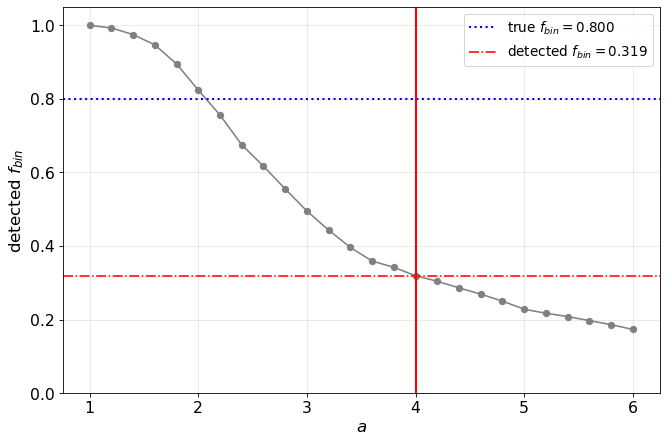

25756
---------- Total time consumed: 0:00:06.936620 --------
2021-12-18 14:30:21.725792 



In [35]:
if (__name__=='__main__'):
    begin = tool.now()
    C = 0.# km/s
    vs_epsilon = [0.5,1,2,4]
    for fbin_true in np.arange(0.2, 1, 0.2):
#     for epsilon in vs_epsilon:
        pi_true, kappa_true, eta_true = -0.5, 0., 0.# float(tool.argvs()[4])
#         fbin_true = 0.5
        epsilon = 4
        sampleSize, obstms = 1000, 10
        population = assemblePopulation()
        data = getFbDtcObs(population, epsilon)
        showImgJointMarginalDistribution(data)
    tool.collect()
    end = tool.now()
    print ('---------- Total time consumed: %s --------'%(tool.now()-begin))
    print (tool.now(),'\n')
    
    
    
    

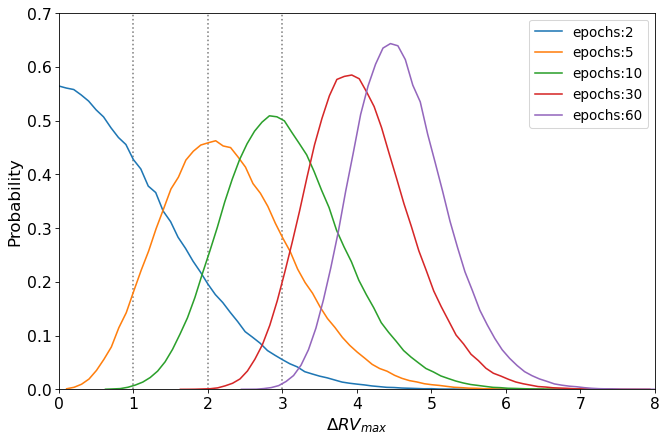

In [31]:
vs_epochs_t = [2,5,10,30,60]
epsilon = 1
plt.figure(figsize=(9,6), dpi=75)
plt.xlim(0,8)
plt.ylim(0,0.7)
plt.xlabel('$\Delta RV_{max}$')
plt.ylabel('Probability')
plt.axvline(epsilon,ls=':', c='grey')
plt.axvline(epsilon*2,ls=':', c='grey')
plt.axvline(epsilon*3,ls=':', c='grey')
for epochs_t in vs_epochs_t:
    deltaRvMax = []
    for i in range(5*10**5):
        deltaRvMax.append(np.ptp(ran.normal(0,epsilon,epochs_t)))
    nums_bin = np.arange(min(deltaRvMax),max(deltaRvMax),0.1)
    n,bins = np.histogram(deltaRvMax, bins=nums_bin, density=1)
    plt.plot(bins[:-1],n,'-', label='epochs:%i'%epochs_t)
plt.tight_layout()
plt.legend()
plt.savefig('./paper_RGB_figures/dtrvMax.pdf')
plt.show()
plt.close()
    
    
    